# 🧠 Heart Disease ML Project - Notebook 1: Data Preprocessing

This notebook handles the **loading**, **cleaning**, **preprocessing**, and **initial exploration** of the UCI Cleveland Heart Disease dataset.

---

## 🔽 1. Import Required Libraries


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

## 📥 2. Load Dataset

We load the **Cleveland Heart Disease** dataset from the UCI Machine Learning Repository and assign proper column names.


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

df = pd.read_csv(url, names=column_names, na_values='?')

## 🔧 3. Handle Missing Values

We fill missing values:
- `'ca'`: numerical, filled with median.
- `'thal'`: categorical, filled with mode.


In [4]:
df['ca'] = df['ca'].fillna(df['ca'].median())
df['thal'] = df['thal'].fillna(df['thal'].mode()[0])

## 🎯 4. Transform Target Column

We simplify the target:
- `0`: no disease  
- `1`: presence of heart disease (any value > 0)

In [5]:
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)
df.to_csv('heart_disease_original_dataset.csv', index=False)

## 🔄 5. Split Dataset into Features and Target


In [6]:
X = df.drop('target', axis=1)
y = df['target']

## ✂️ 6. Train-Test Split (80/20 Stratified)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 🧬 7. Encode Categorical Features

One-hot encode categorical columns for train and test sets.


In [8]:
# Identify categorical columns for one-hot encoding
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

# One-hot encode categorical variables in train and test sets
X_train = pd.get_dummies(X_train, columns=categorical_cols)
X_test = pd.get_dummies(X_test, columns=categorical_cols)

# Align train and test sets to have the same columns
# Add any missing columns in test set with zeroes
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

# Reorder test columns to match training set
X_test = X_test[X_train.columns]

# List of numerical columns to be scaled
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Standardize numerical features using z-score normalization
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

## 💾 9. Save Preprocessed Data


In [9]:
X_train.to_csv('heart_disease_train.csv', index=False)
X_test.to_csv('heart_disease_test.csv', index=False)
y_train.to_csv('heart_disease_train_target.csv', index=False)
y_test.to_csv('heart_disease_test_target.csv', index=False)

## 📊 10. Plot Numerical Feature Distributions


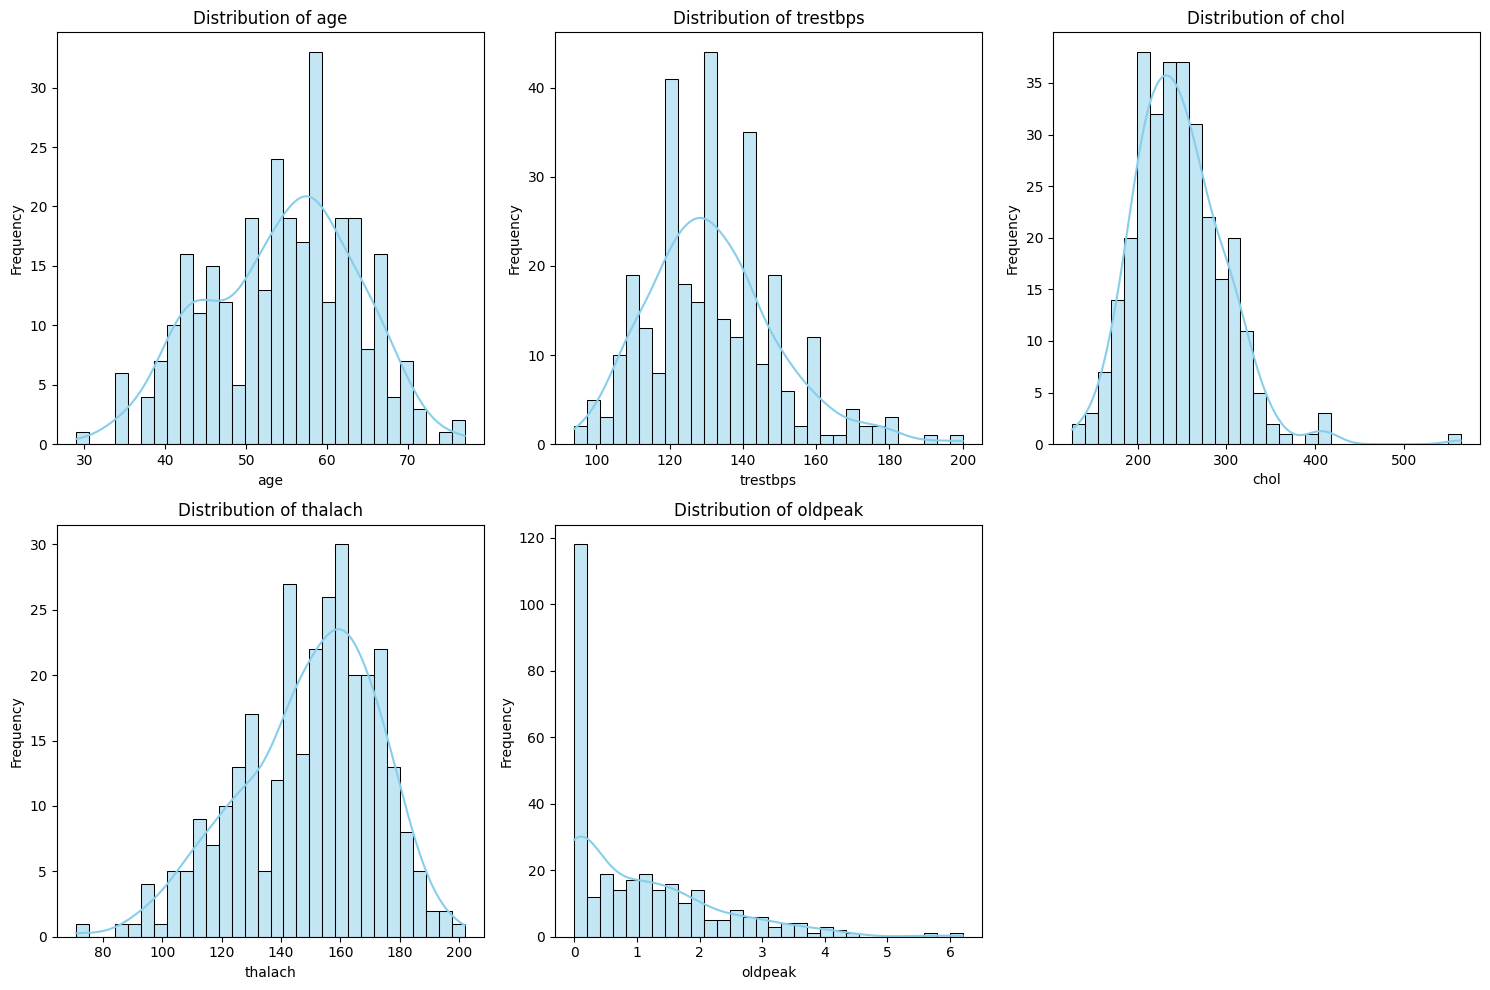

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('numerical_distributions.png')
plt.show()

## 🔥 11. Correlation Heatmap


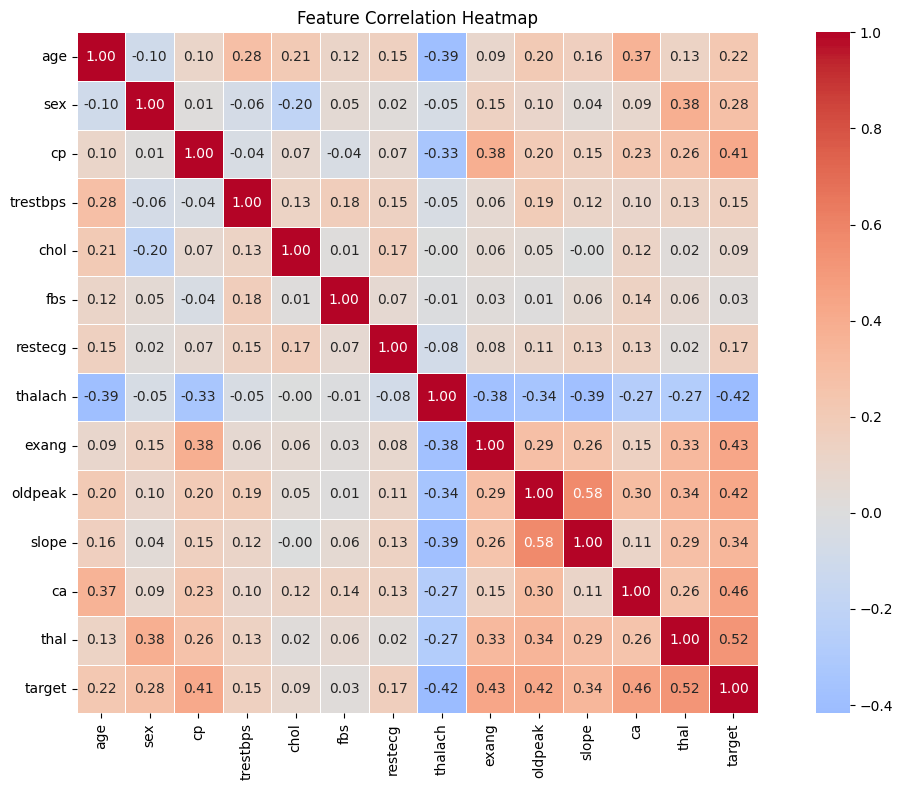

In [11]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(
    corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
    linewidths=0.5, square=True
)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

## ⚖️ 12. Target Variable Distribution


/tmp/ipython-input-12-546209927.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


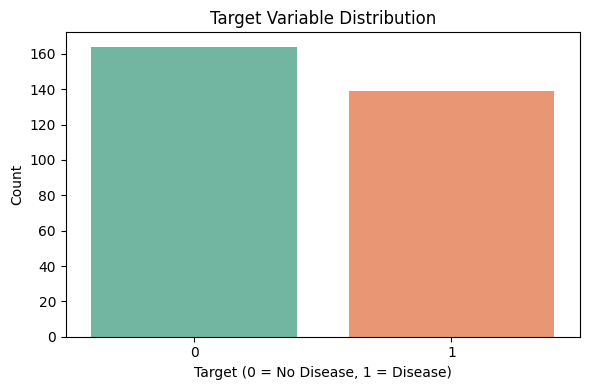

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Target Variable Distribution')
plt.xlabel('Target (0 = No Disease, 1 = Disease)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('target_distribution.png')
plt.show()

## 🎻 13. Violin Plots by Target

Visualize the distribution of numerical features across the two target classes using violin plots.
This helps compare feature spread and detect class-wise patterns.


/tmp/ipython-input-13-3554466054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=df, palette='Pastel1')
/tmp/ipython-input-13-3554466054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=df, palette='Pastel1')
/tmp/ipython-input-13-3554466054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y=col, data=df, palette='Pastel1')
/tmp/ipython-input-13-3554466054.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

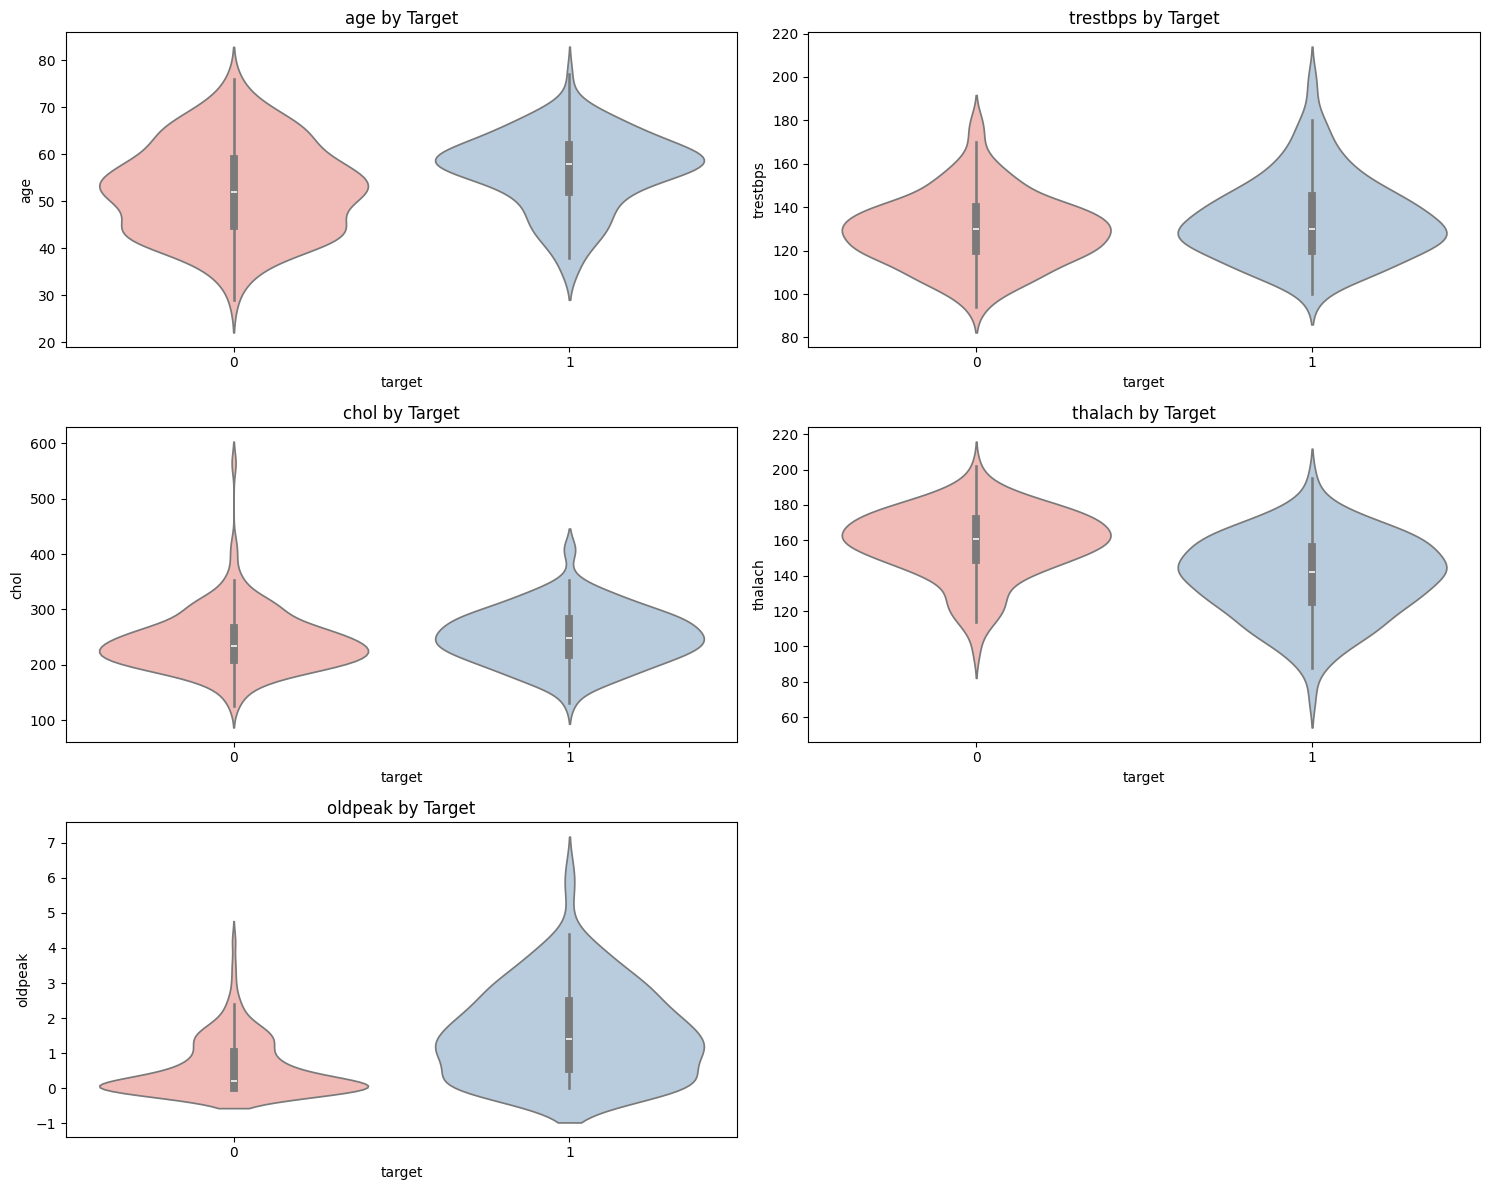

In [13]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.violinplot(x='target', y=col, data=df, palette='Pastel1')
    plt.title(f'{col} by Target')
plt.tight_layout()
plt.savefig('violin_plots_by_target.png')
plt.show()


## 📦 14. Box Plots for Outlier Detection

Use boxplots to inspect potential outliers in each numerical feature.


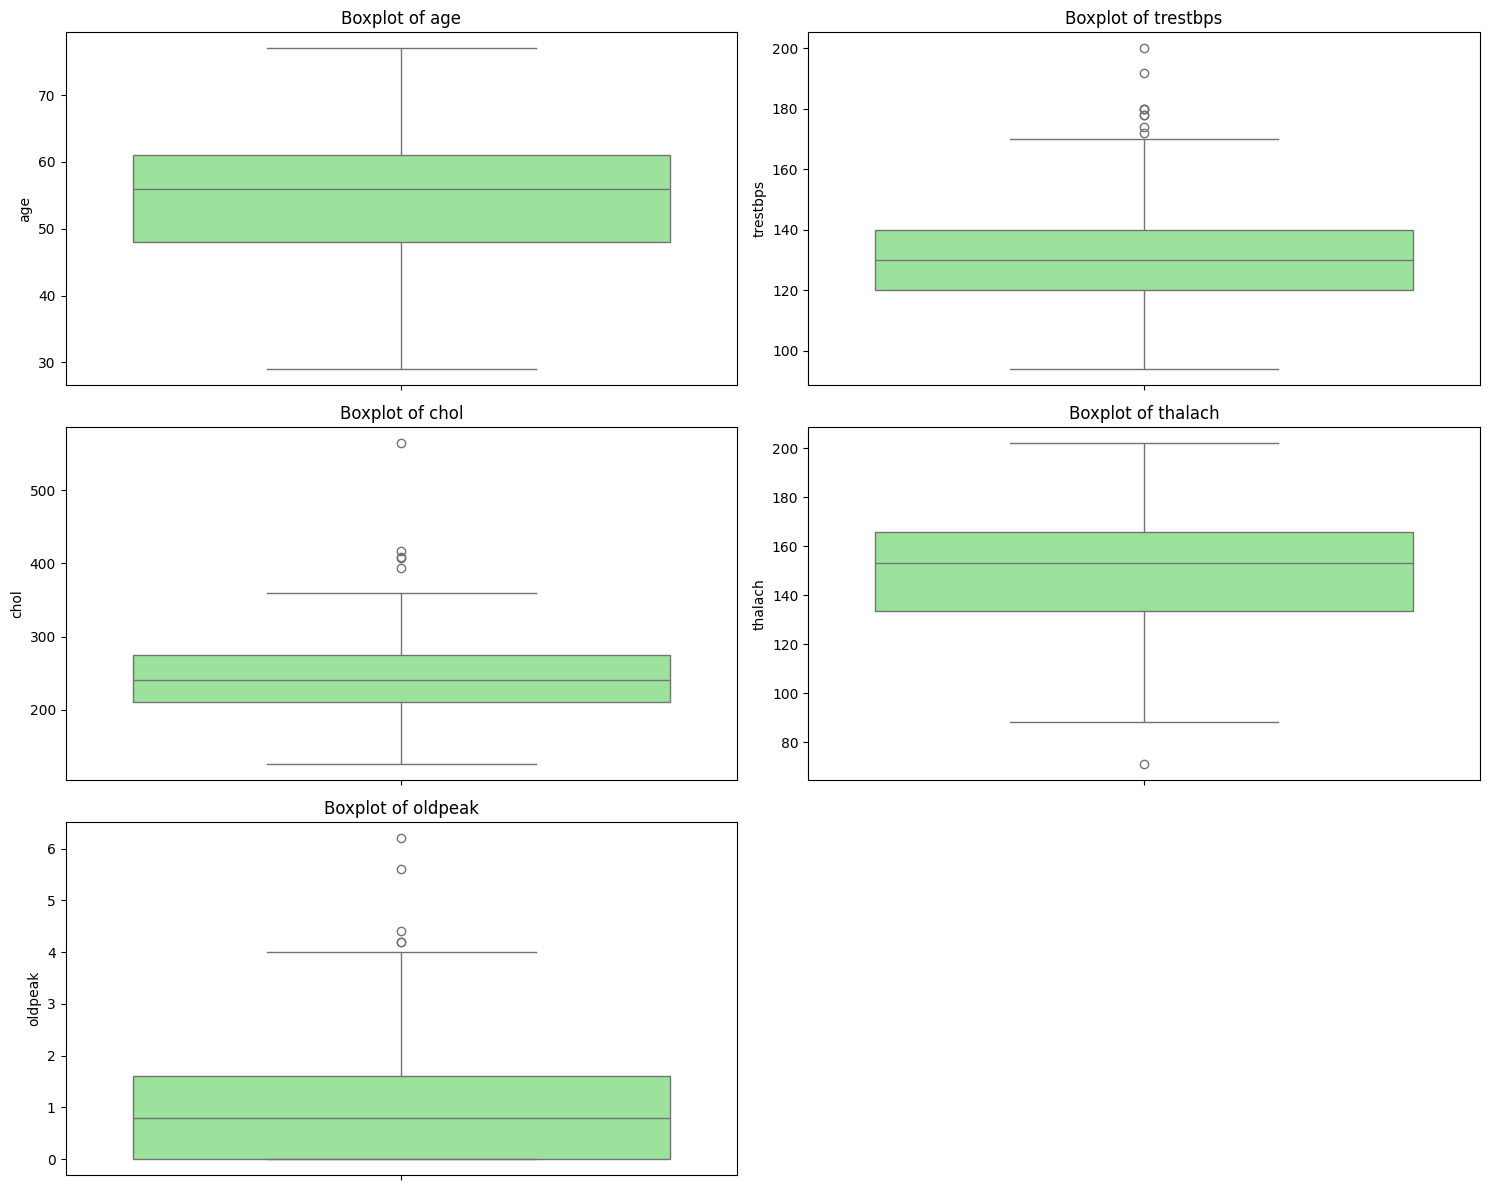

In [14]:
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('boxplots.png')
plt.show()

## 🔗 15. Pair Plot of Selected Features

Visualize pairwise relationships between selected numerical features colored by target class.
This reveals potential feature interactions.


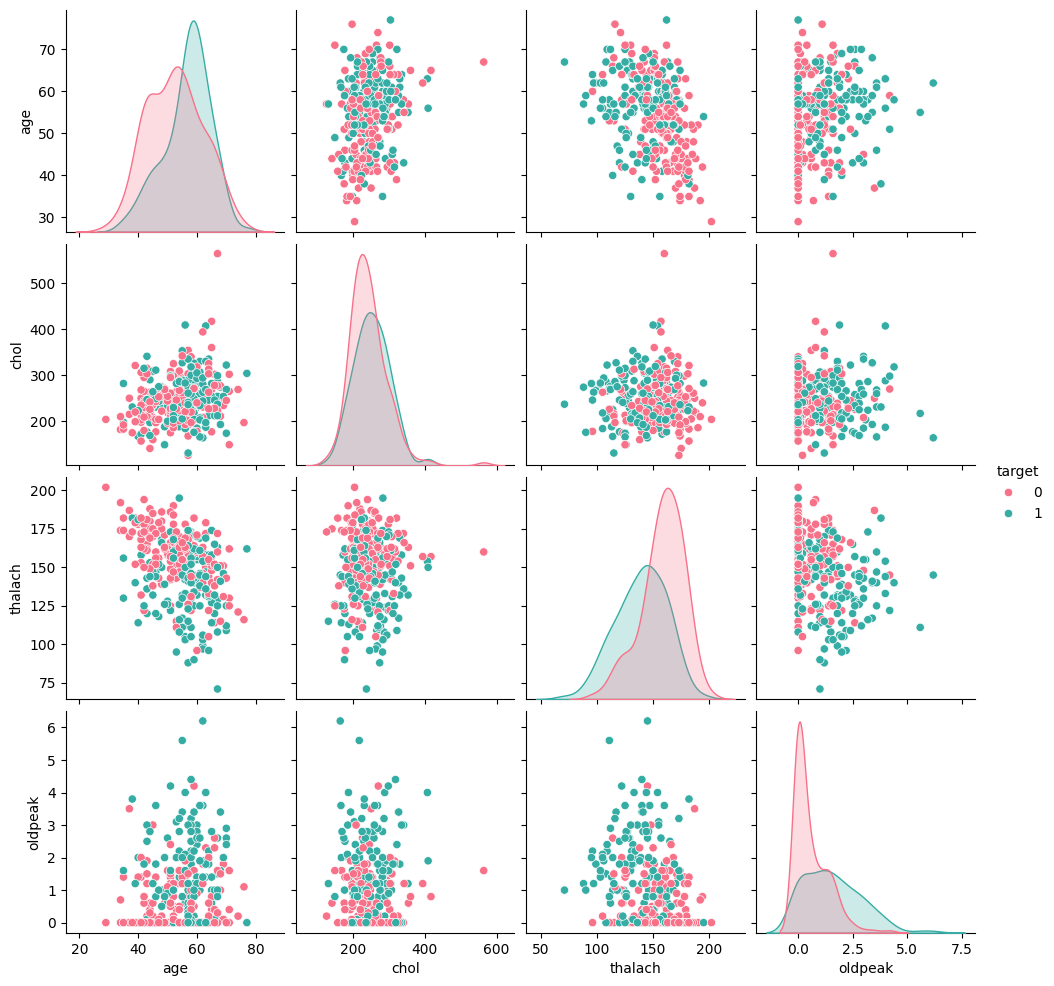

In [15]:
selected_cols = ['age', 'chol', 'thalach', 'oldpeak', 'target']
sns.pairplot(df[selected_cols], hue='target', palette='husl')
plt.savefig('pairplot_selected_features.png')
plt.show()

## 🔺 16. 3D Scatter Plot (Matplotlib)

Explore three important features in 3D using `matplotlib` to capture multivariate relationships.


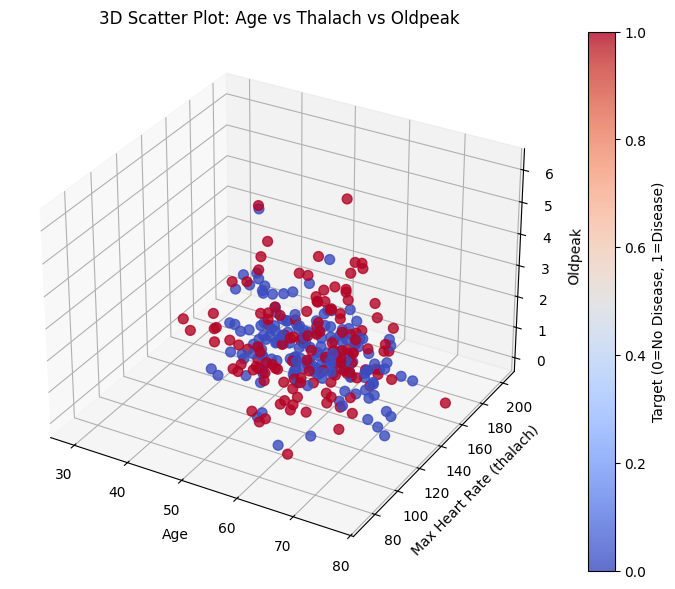

In [16]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

x = df['age']
y = df['thalach']
z = df['oldpeak']
colors = df['target']

scatter = ax.scatter(x, y, z, c=colors, cmap='coolwarm', s=50, alpha=0.8)
ax.set_xlabel('Age')
ax.set_ylabel('Max Heart Rate (thalach)')
ax.set_zlabel('Oldpeak')
ax.set_title('3D Scatter Plot: Age vs Thalach vs Oldpeak')
plt.colorbar(scatter, ax=ax, label='Target (0=No Disease, 1=Disease)')
plt.savefig('3d_scatter_matplotlib.png')
plt.show()

## 🌐 17. Interactive 3D Scatter Plot (Plotly)

Create an interactive 3D visualization using Plotly for deeper exploration in-browser.


In [17]:
fig = px.scatter_3d(
    df,
    x='age',
    y='thalach',
    z='oldpeak',
    color='target',
    title='Interactive 3D Scatter Plot: Age vs Thalach vs Oldpeak',
    color_continuous_scale='Viridis'
)
fig.write_html('3d_scatter_plotly.html')  # Save interactive plot
fig.show()
